# Figure 5

In [40]:
## Basics
import numpy as np
import pandas as pd
import re
import random
import glob
from scipy import stats

## Bio functions
from Bio import AlignIO
from Bio import SeqIO
from Bio.Seq import Seq

## Local functions
import sys
sys.path.append("../code/scripts")
import composition as comp

## Plotting
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams.update({'font.size': 14})
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = "Arial"

## Colors
cscheme = {'pos':'#0177BB', 'neg':'#CB3627', 'dis':'#828282', 'helix':'#009988', 'sheet':'#EE7733', 'cr':'#AA4499',
          'null':"black"}

## Set seed for consistency
### In the future when writing code with random remember to use new methods which explicitly create generators
seed = 212121

In [5]:
all_cr_data = pd.read_csv("../data/charged_regions/cr_filtered_aflabel.csv", comment = "#")
eIF5As = all_cr_data[all_cr_data['gene']=="RPG1"]
eIF5As

,orf,gene,seq.len,left.bound,right.bound,region.seq,region.len,charge.asymmetry,frac.charge,kappa1,kappa2,uni_id,orf_label,label
28,YBR079C,RPG1,965,499,549,ASTASKEVSEEENTEPEVQEEKEETDEALGPQETEDGEEKEEESDP...,51,0.226667,0.490196,0.064919,0.231738,P38249,verified,disordered
29,YBR079C,RPG1,965,571,618,NASYMEKVRIARETLIKKNKDDLEKISKIVDERVKRSQEQKQKHMEHA,48,0.015152,0.458333,0.041641,0.105198,P38249,verified,helix
30,YBR079C,RPG1,965,790,852,HVSGTKESELAAIRNQKKAELEAAKKARIEEVRKRRYEEAIARRKE...,63,0.008466,0.476190,0.079436,0.182138,P38249,verified,helix


## Alphafold

In [46]:
eIF3A_af = AlignIO.read('../data/eIF3A/eIF3A-af-aligned.fa', format='fasta')
eIF3A_af_mat = np.asarray(eIF3A_af)

# Alignment Boundaries of N-terminal region of interest in S. cerevisiae
start = 922
end = 1032

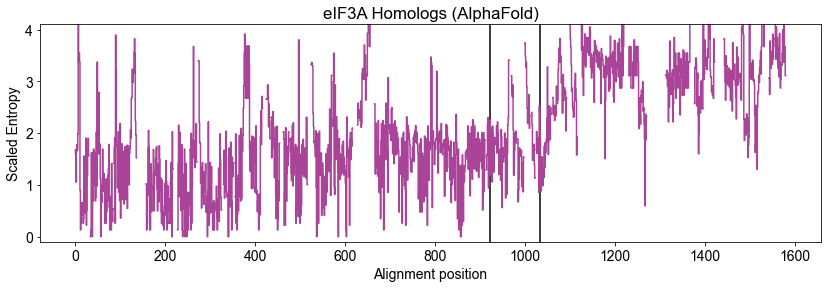

In [47]:
eIF3A_af_seq_ents = []
coverage_cutoff = 0.1

for p, pos in enumerate(eIF3A_af_mat.T):
    eIF3A_af_seq_ents.append(stats.entropy(comp.get_character_freqs(pos, gaps=True)[0]))

coverage_weights = []
    
for p, pos in enumerate(eIF3A_af_mat.T):
    seqlen = len(''.join(pos))
    coverage = seqlen / (seqlen - ''.join(pos).count('-'))
    if 1/coverage < coverage_cutoff:
        coverage_weights.append(np.nan)
    else:
        coverage_weights.append(coverage)
    
plt.figure(figsize=(14, 4))
plt.step(np.arange(0, len(eIF3A_af_seq_ents)),
         np.array(eIF3A_af_seq_ents)*np.array(coverage_weights), color = cscheme['cr'])
plt.vlines(x = start, ymin=-5, ymax=100, color="black")
plt.vlines(x = end, ymin=-5, ymax=100, color="black")
plt.xlabel('Alignment position')
plt.ylabel('Scaled Entropy')
plt.title("eIF3A Homologs (AlphaFold)")
plt.ylim(-0.1, 4.1)
plt.show()

## AYbRAH

In [10]:
# FUN12_aybrah = AlignIO.read('../data/eIF5B/aybrah_eIF5B_aligned.fa', format='fasta')
# for record in FUN12_aybrah:
#     outs = re.search("\s[a-z]{3}\s", record.description)
#     record.id = outs.group(0).strip()

# aybrah_start = 309
# aybrah_end = 397

# print(FUN12_aybrah[:, start:end])

# FUN12_aybrah_mat = np.asarray(FUN12_aybrah)

In [11]:
# FUN12_aybrah_seq_ents = []
# coverage_cutoff = 0.1

# for p, pos in enumerate(FUN12_aybrah_mat.T):
#     FUN12_aybrah_seq_ents.append(stats.entropy(comp.get_character_freqs(pos, gaps=True)[0]))

# coverage_weights = []
    
# for p, pos in enumerate(FUN12_aybrah_mat.T):
#     seqlen = len(''.join(pos))
#     coverage = seqlen / (seqlen - ''.join(pos).count('-'))
#     if 1/coverage < coverage_cutoff:
#         coverage_weights.append(np.nan)
#     else:
#         coverage_weights.append(coverage)
    
# plt.figure(figsize=(14, 4))
# plt.step(np.arange(0, len(FUN12_aybrah_seq_ents)),
#          np.array(FUN12_aybrah_seq_ents)*np.array(coverage_weights), color = 'grey')
# plt.vlines(x = aybrah_start, ymin=-5, ymax=100, color="black")
# plt.vlines(x = aybrah_end, ymin=-5, ymax=100, color="black")
# plt.xlabel('Position in alignment')
# plt.ylabel('Scaled Entropy')
# plt.title("FUN12 Homologs (AYbRAH): Entropy")
# plt.ylim(-0.1, 5)
# plt.show()

In [11]:
# more_FUN12s = AlignIO.read('../data/eIF5B/OrthoDB_eIF5B_atfungi_aligned_refined2.fa', format='fasta')

# # Notes for finding organisms
# # S. cer is 1294385_1
# # The OrthoDB is H833_YJM1573A00027 (YJM1573), 

# odb_start = 803
# odb_end = 908

In [12]:
# start2 = 0
# end2 = 1325
# endd = 2123

# more_FUN12s_all_mat = np.asarray(more_FUN12s)[:,start2:endd]
# more_FUN12_all = []

# for record in more_FUN12s:
#     more_FUN12_all.append(record.seq[start2:endd])

# more_FUN12_all_seqs_gapped = [str(s) for s in more_FUN12_all]
# more_FUN12_all_seqs = [str(s).replace('-', "") for s in more_FUN12_all]

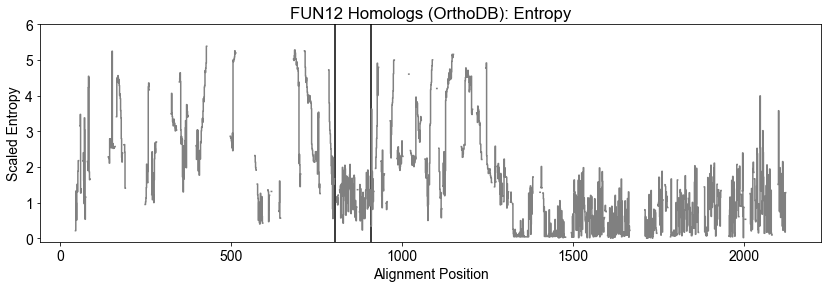

In [13]:
# FUN12_all_seq_ents = []
# coverage_cutoff = 0.1

# for p, pos in enumerate(more_FUN12s_all_mat.T):
#     FUN12_all_seq_ents.append(stats.entropy(comp.get_character_freqs(pos, gaps=True)[0]))

# all_coverage_weights = []
    
# for p, pos in enumerate(more_FUN12s_all_mat.T):
#     seqlen = len(''.join(pos))
#     coverage = seqlen / (seqlen - ''.join(pos).count('-'))
#     if 1/coverage < coverage_cutoff:
#         all_coverage_weights.append(np.nan)
#     else:
#         all_coverage_weights.append(coverage)
    
# plt.figure(figsize=(14, 4))
# plt.step(np.arange(start2, start2+len(FUN12_all_seq_ents)),
#          np.array(FUN12_all_seq_ents)*np.array(all_coverage_weights), color = 'grey')
# plt.xlabel('Alignment Position')
# plt.ylabel('Scaled Entropy')
# plt.title("FUN12 Homologs (OrthoDB): Entropy")
# plt.vlines(x = odb_start, ymin=-5, ymax=100, color="black")
# plt.vlines(x = odb_end, ymin=-5, ymax=100, color="black")
# plt.ylim((-0.1,6))
# plt.show()

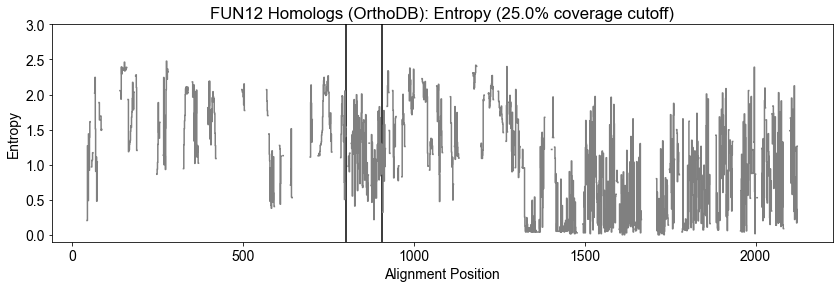

In [14]:
# coverage_cutoff2 = 0.25
# all_coverage_cutoffs = []
    
# for p, pos in enumerate(more_FUN12s_all_mat.T):
#     seqlen = len(''.join(pos))
#     coverage = seqlen / (seqlen - ''.join(pos).count('-'))
#     if 1/coverage < coverage_cutoff2:
#         all_coverage_cutoffs.append(np.nan)
#     else:
#         all_coverage_cutoffs.append(1)
    
# plt.figure(figsize=(14, 4))
# plt.step(np.arange(start2, start2+len(FUN12_all_seq_ents)),
#          np.array(FUN12_all_seq_ents)*np.array(all_coverage_cutoffs), color = 'grey')
# plt.xlabel('Alignment Position')
# plt.ylabel('Entropy')
# plt.title("FUN12 Homologs (OrthoDB): Entropy ({}% coverage cutoff)".format(coverage_cutoff2*100))
# plt.vlines(x = odb_start, ymin=-5, ymax=100, color="black")
# plt.vlines(x = odb_end, ymin=-5, ymax=100, color="black")
# plt.ylim((-0.1,3))
# plt.show()

## Length variation

In [12]:
# for each alignment dataset
# identify region
# iterate through rows, remove gaps, and return length

def get_region_lengths(msa, start, end):
    """
    Given an AlignIO object (msa), return a vector of the lengths of all the regions in a range from start to end 
    (inclusive) without gaps
    """
    lengths = []
    for spec in msa:
        region_seq = str(spec.seq[start:end+1]).replace("-", "")
        lengths.append(len(region_seq))
    return(lengths)

In [13]:
af_lengths = get_region_lengths(eIF3A_af, start, end)
#aybrah_helix_lengths = get_region_lengths(FUN12_aybrah, aybrah_start, aybrah_end)
#odb_helix_lengths = get_region_lengths(more_FUN12s, odb_start, odb_end)

#af_comp_lengths = get_region_lengths(FUN12_af, 1230, 1310)

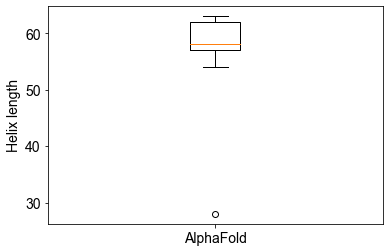

In [14]:
fig, ax = plt.subplots(figsize = (6,4))
bp = ax.boxplot([af_lengths])#, aybrah_helix_lengths, odb_helix_lengths])
#for flier in bp['fliers']:
#    flier.set(marker ='.',
#              color ='#e7298a',
#              alpha = 0.5)
ax.set_xticklabels(['AlphaFold'])#, 'AYbRAH', "OrthoDB"])
ax.set_ylabel("Helix length")
plt.show()

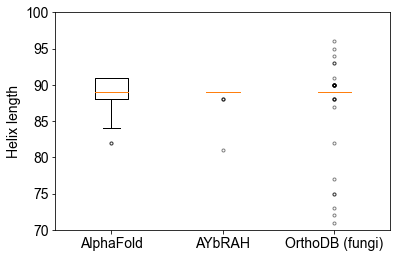

In [19]:
# fig, ax = plt.subplots(figsize = (6,4))
# bp = ax.boxplot([af_helix_lengths, aybrah_helix_lengths, odb_helix_lengths])
# for flier in bp['fliers']:
#     flier.set(marker ='.',
#               color ='#e7298a',
#               alpha = 0.5)
# ax.set_xticklabels(['AlphaFold', 'AYbRAH', "OrthoDB (fungi)"])
# ax.set_ylabel("Helix length")
# ax.set_ylim(70, 100)
# plt.show()

In [15]:
print(af_lengths)
print(np.sqrt(np.var(af_lengths)))

[28, 63, 58, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 58, 58, 58, 58, 54, 54, 62, 62, 55, 58, 59, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62]
5.781462282368447


## Secondary Structure Prediction from Alphafold

This is a different set of proteins, but I've extracted all the predictions from alphafold annotated as "eukaryotic translation initiation factor 5B" -- this includes a couple different paralogs in the plant genomes for example.

In [16]:
import mdtraj as md

In [24]:
eIF3A_af_ss = {}

for struct in glob.glob('../data/eIF3A/*.pdb'):
    uni_id = struct[17:23]
    #print(uni_id)
    s = md.load(struct)
    ss = md.compute_dssp(s, simplified=True)[0]
    eIF3A_af_ss[uni_id] = ss

/Users/triandafillou/opt/anaconda3/lib/python3.8/site-packages/mdtraj/formats/pdb/pdbfile.py:196: UserWarning: Unlikely unit cell vectors detected in PDB file likely resulting from a dummy CRYST1 record. Discarding unit cell vectors.
  warnings.warn('Unlikely unit cell vectors detected in PDB file likely '


## Secondary Structure on Alignment

In [41]:
recs = []

for sp in eIF3A_af:
    sequence = []
    i = 0
    for a, aa in enumerate(sp.seq):
        if aa == '-':
            sequence.append('-')
        else:
            uni_id = sp.id[12:18]
            if eIF3A_af_ss[uni_id][i] not in ["H", "E", "C"]:
                print(uni_id)
                print(a)
                break
            sequence.append(eIF3A_af_ss[uni_id][i])
            i += 1
    sequence = ''.join(sequence)        
    record = SeqIO.SeqRecord(seq = Seq(sequence), id = uni_id)
    recs.append(record)
    
eIF3A_ss_alignment = AlignIO.MultipleSeqAlignment(records=recs)

In [42]:
print(eIF3A_ss_alignment[:, start:end])

Alignment with 35 rows and 62 columns
-----------------------------HHHHHH------HHH...HHH Q86B20
HHHHHHHHHHCCCHHHHHHHCCCCCCCCCCCCCHHHHHHHHHHH...HHH A9V549
H---HHHHHHHHHHHCCCCCC-CCCCCC-CCCCHHHHHHHHHHH...HHH A7TL64
H---HHHHHHHHHC--CCCCCCCCCCCC-CCCCHHHHHHHHHHH...HHH P38249
H---HHHHHHHHHH--HCCCCCCCHHHH-HCCCHHHHHHHHHHH...HHH Q6CT90
H---HHHHHHHHHH--HCCCCCCCCCHH-HHCCHHHHHHHHHHH...HHH Q75DT8
H---HHHHHHHCCC--CCCCCCCCHHHC-CCCCHHHHHHHHHHH...HHH P0CN42
C---HHHHHHHHHH--HCCCCCCCCCCC-CCCCHHHHHHHHHHH...HHH Q59PL9
C---CCCCHHHHCC--CCCCCCCCCCCC-CCCCHHHHHHHHHHH...HHH A5E1T3
H---HHHHHHHHHH--HCCCCCCCCCCC-CCCCHHHHHHHHHHH...HHH A5DHL9
H---HHHHHHHHHH--HCCCCCCCCCCC-CCCCHHHHHHHHHHH...HHH B5RUP5
H---HHHHHHHHCC--CCCCCCCCCCCC-CCCCCCHHHHHHHHH...HHH O74760
H---HHHHHHHHHH--HCCCCCCCCCCC-CCCCHHHHHHHHHHH...HHH Q6C161
H---HCCHHHCCHH--HCCCCCCCCCCC-CCCCHHHHHHHHHHH...HHH Q4P358
H---HHHHHHHHCCCCCCCC-CCCCCCC-CCCCHHHHHHHHHHH...HHH Q1DXU0
H---HHHHHHHHCCCCCCCC-CCCCCCC-CCCCHHHHHHHHHHH...HHH A1D4A7
H---HCCCCCCCCCCCCCCC-CCCCCCC-CCCCC

In [45]:
#SeqIO.write(eIF3A_ss_alignment, "../data/eIF3A/eIF3A-ss-aligned.fa", "fasta")

35